In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
df1 = pd.read_csv("../experiments/DeepRM_2/simu5,numex5,epoch51/metrics.csv")
df1.head()

,Name,Value,Timestamp,Step
0,NumTrajs,50.000000,0,1
1,NumTimesteps,1351.000000,0,1
2,MaxRew,-3.344904,0,1
3,MeanRew_lower,10.710404,0,1
4,MeanRew_upper,-13.942629,0,1


In [4]:
df2 = pd.read_csv("../experiments/DeepRM_ECO/simu5,numex5,epoch51/metrics.csv")
df2.head()

,Name,Value,Timestamp,Step
0,NumTrajs,50.000000,0,1
1,NumTimesteps,1360.000000,0,1
2,MaxRew,-2.899730,0,1
3,MeanRew_lower,10.973376,0,1
4,MeanRew_upper,-14.142006,0,1


In [5]:
df3 = pd.read_csv("../experiments/DeepRM/simu5,numex5,epoch51/metrics.csv")
df3.head()

,Name,Value,Timestamp,Step
0,NumTrajs,50.000000,0,1
1,NumTimesteps,679.000000,0,1
2,MaxRew,-3.086667,0,1
3,MeanRew_lower,2.706866,0,1
4,MeanRew_upper,-3.870000,0,1


In [6]:
df4 = pd.read_csv("../experiments/SJF/simu5,numex5,epoch51/metrics-heuristics.csv")
df4.head()

,Heuristic,Metric,Value,Epoch
0,SJF,MeanSlowdown,1.800000,1
1,SJF,MaxRew,-3.176748,1
2,SJF,MeanRew_upper,-5.286668,1
3,SJF,MeanSlowdown,1.800000,2
4,SJF,MaxRew,-3.176748,2


In [7]:
# Filter for MeanSlowdown
mean_slowdown_df1 = df1[df1['Name'] == 'MeanSlowdown']
mean_slowdown_df2 = df2[df2['Name'] == 'MeanSlowdown']
mean_slowdown_df3 = df3[df3['Name'] == 'MeanSlowdown']
mean_slowdown_df4 = df4[df4['Metric'] == 'MeanSlowdown']
mean_slowdown_df1.head()


,Name,Value,Timestamp,Step
5,MeanSlowdown,4.510,0,1
14,MeanSlowdown,5.945,0,2
23,MeanSlowdown,4.870,0,3
32,MeanSlowdown,3.365,0,4
41,MeanSlowdown,3.870,0,5


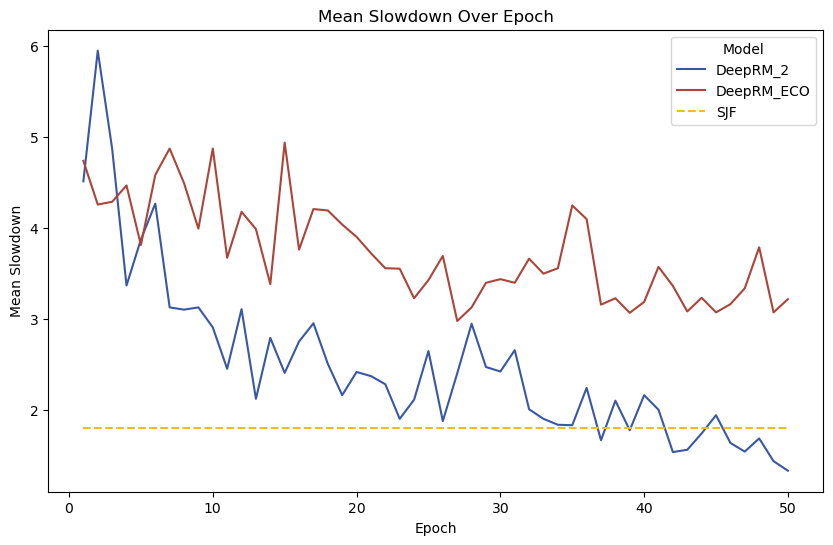

In [9]:
# Plot MeanSlowdown over steo
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_slowdown_df1, x='Step', y='Value', label='DeepRM_2', color='#3957a5')
sns.lineplot(data=mean_slowdown_df2, x='Step', y='Value', label='DeepRM_ECO', color='#ac443a')
# sns.lineplot(data=mean_slowdown_df3, x='Step', y='Value', label='DeepRM', color='#ac447a')
sns.lineplot(data=mean_slowdown_df4, x='Epoch', y='Value', label='SJF', color='#f2bb1d', linestyle="--")
plt.title('Mean Slowdown Over Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Slowdown')
plt.legend(title='Model')
plt.show()

In [15]:
reward_df1 = df1[df1['Name'].isin(['MaxRew', 'MeanRew_upper'])]
reward_df2 = df2[df2['Name'].isin(['MaxRew', 'MeanRew_upper'])]
# reward_df3 = df3[df3['Name'].isin(['MaxRew', 'MeanRew_upper'])]
reward_df4 = df4[df4['Metric'].isin(['MeanRew_upper'])]

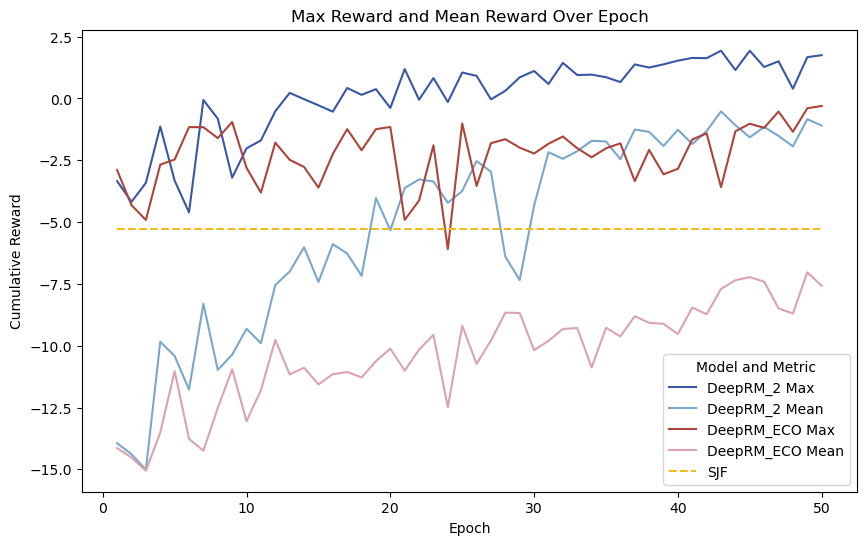

In [17]:
# Plot reward over step
plt.figure(figsize=(10, 6))
sns.lineplot(data=reward_df1[reward_df1['Name'] == 'MaxRew'], x='Step', y='Value', label='DeepRM_2 Max', color='#3957a5')
sns.lineplot(data=reward_df1[reward_df1['Name'] == 'MeanRew_upper'], x='Step', y='Value', label='DeepRM_2 Mean', color='#7aa7cb')
sns.lineplot(data=reward_df2[reward_df2['Name'] == 'MaxRew'], x='Step', y='Value', label='DeepRM_ECO Max', color='#ac443a')
sns.lineplot(data=reward_df2[reward_df2['Name'] == 'MeanRew_upper'], x='Step', y='Value', label='DeepRM_ECO Mean', color='#dba3af')
# sns.lineplot(data=reward_df3[reward_df3['Name'] == 'MaxRew'], x='Step', y='Value', label='DeepRM Max', color='#ac447a')
# sns.lineplot(data=reward_df3[reward_df3['Name'] == 'MeanRew_upper'], x='Step', y='Value', label='DeepRM Mean', color='#dbb77f')
sns.lineplot(data=reward_df4[reward_df4['Metric'] == 'MeanRew_upper'], x='Epoch', y='Value', label='SJF', color='#f2bb1d', linestyle='--')

# Add titles and labels
plt.title('Max Reward and Mean Reward Over Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cumulative Reward')
plt.legend(title='Model and Metric')
plt.show()